# Introduction to Image Processing

Mojdeh Rastgoo - Guillaume Lemaitre - Desire Sidibe

## **Spatial Filtering and de-noising**

The modules which are commonly used are entered in the following cell.

In [23]:
%matplotlib inline
#%pprint off

# Matplotlib library
import matplotlib.pyplot as plt
from matplotlib import cm

# Numpy libraryfrom scipy import ndimage

import numpy as np

from skimage import io 
from skimage import img_as_ubyte
from skimage import img_as_float
from skimage import color

from skimage.morphology import disk

# import the function to add some noise
from skimage.util import random_noise

from skimage import filters
from skimage import transform
from skimage import feature
from skimage import morphology
from scipy import ndimage
from scipy.ndimage.filters import convolve


In [3]:
Path = './images/'
lena_im = io.imread(Path.__add__('lena-grey.bmp'))
lena_im = img_as_float(lena_im)

## Smoothing

### Mean filter 
Smooth the lena image, by mean filter, using different disk circles with radius of $ r = 1, 3, 5, 7$

Use [`skimage.filter.rank.mean`](http://scikit-image.org/docs/dev/api/skimage.filters.rank.html#skimage.filters.rank.mean) and [`skimage.morphology.disk`](http://scikit-image.org/docs/dev/api/skimage.morphology.html#skimage.morphology.disk) function 

/home/umamaheswaran/anaconda2/lib/python2.7/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))


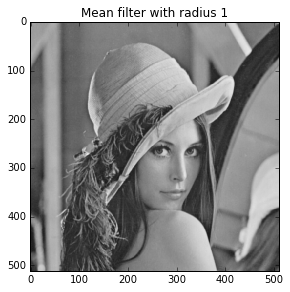

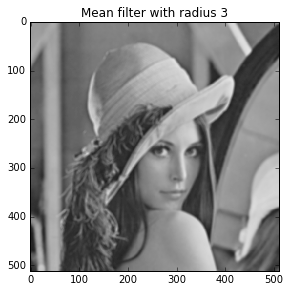

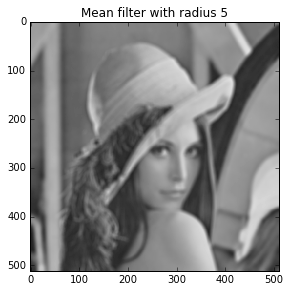

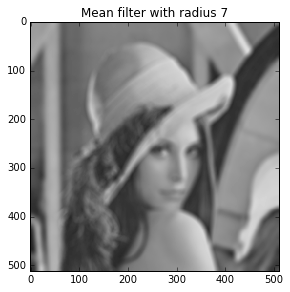

In [4]:
lena_mean1 = filters.rank.mean(lena_im, morphology.disk(1))
plt.figure()
io.imshow(lena_mean1)
plt.title('Mean filter with radius 1')

lena_mean3 = filters.rank.mean(lena_im, morphology.disk(3))
plt.figure()
io.imshow(lena_mean3)
plt.title('Mean filter with radius 3')

lena_mean5 = filters.rank.mean(lena_im, morphology.disk(5))
plt.figure()
io.imshow(lena_mean5)
plt.title('Mean filter with radius 5')

lena_mean7 = filters.rank.mean(lena_im, morphology.disk(7))
plt.figure()
io.imshow(lena_mean7)
plt.title('Mean filter with radius 7')

### Filtering using convolution 
Once again apply the mean fiter, howver instead of using `filter.rank` make your mean mask having the same size as the last filter you applied and use convolution to apply the filter. 

The function [`ndimage.filters.convolve`](http://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.filters.convolve.html#scipy.ndimage.filters.convolve) from `scipy` allows to compute the convolution between a mask (filter) and an image.

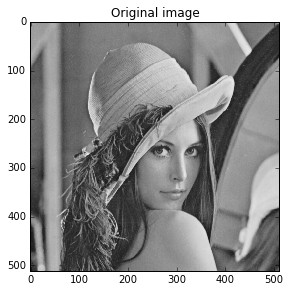

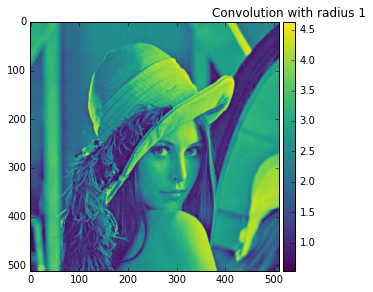

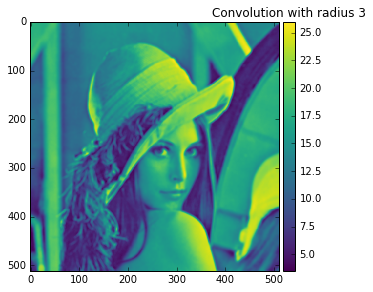

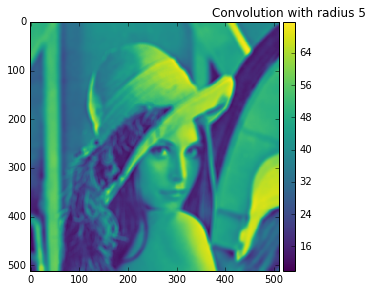

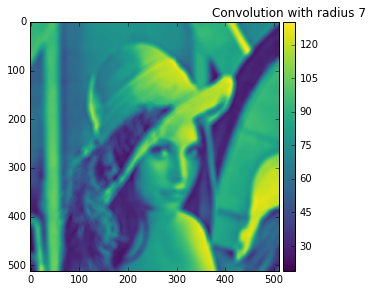

In [21]:
plt.figure()
io.imshow(lena_im)
plt.title('Original image')

#k = np.array([[1,1,1],[1,1,1],[1,1,1]])k

lena_convolve1 = convolve(lena_im, morphology.disk(1))
plt.figure()
io.imshow(lena_convolve1)
plt.title('Convolution with radius 1')

lena_convolve3 = convolve(lena_im, morphology.disk(3))
plt.figure()
io.imshow(lena_convolve3)
plt.title('Convolution with radius 3')

lena_convolve5 = convolve(lena_im, morphology.disk(5))
plt.figure()
io.imshow(lena_convolve5)
plt.title('Convolution with radius 5')

lena_convolve7 = convolve(lena_im, morphology.disk(7))
plt.figure()
io.imshow(lena_convolve7)
plt.title('Convolution with radius 7')

Any filtering will work is a similar manner. Only the mask (filter) will change and will define the nature of the filtering.

### Common spatial filtering

In this section, you will learn about spatial filters which are commonly used in image processing. These filters were already implemented in `skimage` and can be directly used without applying the previous processing.

The modules `filters` and `filters.rank` implement well known filters.

In [6]:
from skimage import filters

#####  First-order edge detector

You already saw during the lecture the following edge detectors: (i) Roberts, (ii) Prewitt, and (iii) Sobel.
All these operators are an approximation of the first derivative. They are highly sensitive to noise even if Prewitt and Sobel have a smoothing process embedded.

Scharr opearator as an improved version of Sobel such that the operator provides a rotational symmetry.

The following functions are defined in `skimage`: `filters.roberts`, `filters.prewitt`, `filters.sobel`, and `filters.scharr`. 

**Apply these different filters on Leaves image (`leaves.jpg`).**

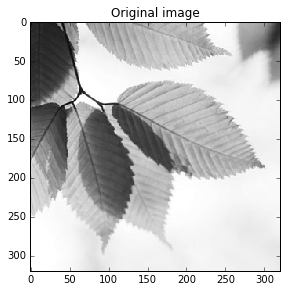

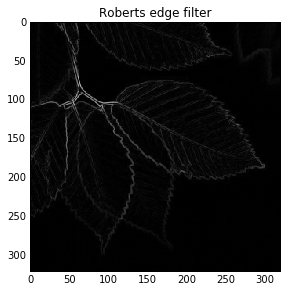

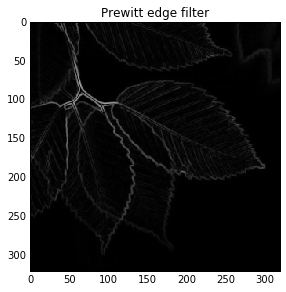

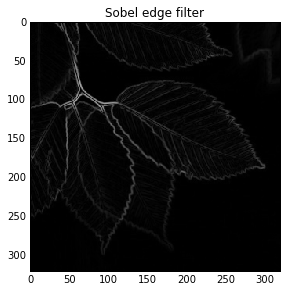

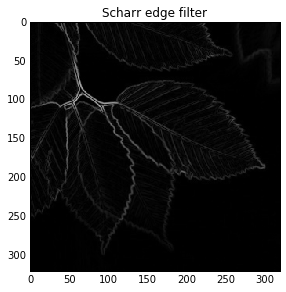

In [7]:
leaves_im = io.imread(Path.__add__('leaves.jpg'), as_grey=True)

plt.figure()
io.imshow(leaves_im)
plt.title('Original image')

#Roberts
leaves_roberts = filters.roberts(leaves_im)
plt.figure()
io.imshow(leaves_roberts)
plt.title('Roberts edge filter')
   
#Prewitt    
leaves_prewitt = filters.prewitt(leaves_im)
plt.figure()
io.imshow(leaves_prewitt)
plt.title('Prewitt edge filter')
 
#Sobel
leaves_sobel = filters.sobel(leaves_im)
plt.figure()
io.imshow(leaves_sobel)
plt.title('Sobel edge filter')
 
#Scharr
leaves_scharr = filters.scharr(leaves_im)
plt.figure()
io.imshow(leaves_scharr)
plt.title('Scharr edge filter')

##### Second-order edge detector

The second order edge detector is using the Laplace kernel as seen in lectures.

The `skimage` toolbox does not provide any implementation of this filter (yet). The `scipy` toolbox, however, does through the function `ndimage.filters.laplace`.

**Apply this filter on the Leaves image.**

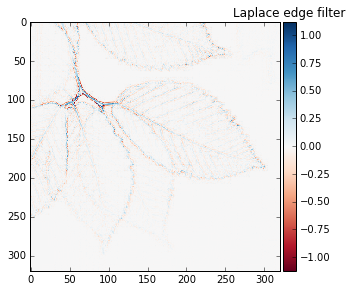

In [8]:
leaves_laplace = ndimage.filters.laplace(leaves_im)
plt.figure()
io.imshow(leaves_laplace)
plt.title('Laplace edge filter')

## Denoising filters

Different filters can be applied in the spatial domain to remove the noise.
These filters can be found in the module `filters.rank`.

Before to start denoising the image, we need to generate some corrupted image using the noise generator from `skimage`.
For this purpose, we will use the function `util.random_noise`.

**Generate corrupted some Lena images with gaussian noise, salt & peppers noise, and speckle noise. Keep the default parameters.**

In [9]:
from skimage import util

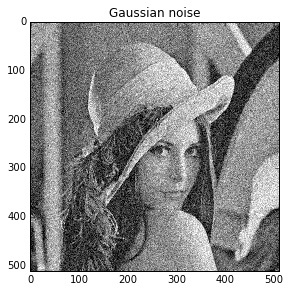

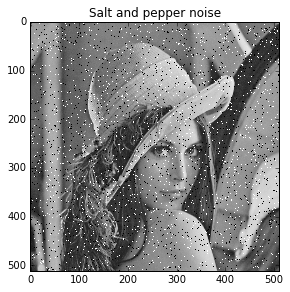

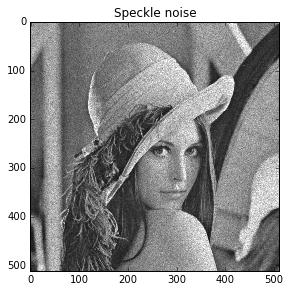

In [10]:

# Corrupt Lena
lena_gaussian = util.random_noise(lena_im, mode='gaussian')
lena_sp = util.random_noise(lena_im, mode='s&p')
lena_speckle = util.random_noise(lena_im, mode='speckle')

# Show the different corrupted Lena
plt.figure()
io.imshow(lena_gaussian)
plt.title('Gaussian noise')          
plt.figure()
io.imshow(lena_sp)
plt.title('Salt and pepper noise')
plt.figure()
io.imshow(lena_speckle)
plt.title('Speckle noise')

**Apply `median`, `mean` and `alpha-trimmed` mean filter on different corrupted Lena images with the mask corresponding to disk 1 and 3.**

 `alpha-trimmed` ([`mean_percentile`](http://scikit-image.org/docs/dev/api/skimage.filters.rank.html#skimage.filters.rank.mean_percentile)) mean filter works similar to normal mean filter. However, it considers only the grey values inside a specific range.

** mean filter: ** 

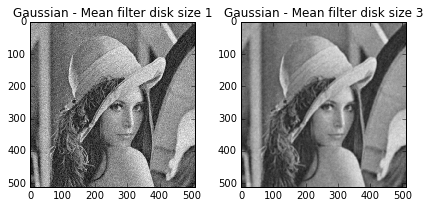

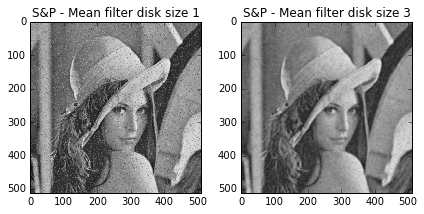

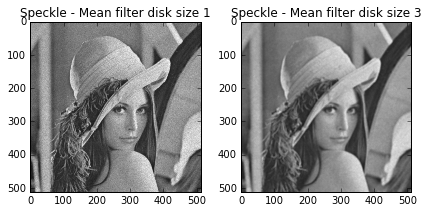

In [11]:
#Gaussian noise
lena_gaussian_mean1 = filters.rank.mean(lena_gaussian, morphology.disk(1))
lena_gaussian_mean3 = filters.rank.mean(lena_gaussian, morphology.disk(3))

plt.figure()
plt.subplot(121)
plt.title('Gaussian - Mean filter disk size 1')
io.imshow(lena_gaussian_mean1)
plt.subplot(122)
plt.title('Gaussian - Mean filter disk size 3')
io.imshow(lena_gaussian_mean3)

#Salt and pepper noise
lena_sp_mean1 = filters.rank.mean(lena_sp, morphology.disk(1))
lena_sp_mean3 = filters.rank.mean(lena_sp, morphology.disk(3))

plt.figure()
plt.subplot(121)
plt.title('S&P - Mean filter disk size 1')
io.imshow(lena_sp_mean1)
plt.subplot(122)
plt.title('S&P - Mean filter disk size 3')
io.imshow(lena_sp_mean3)

#Speckle noise
lena_speckle_mean1 = filters.rank.mean(lena_speckle, morphology.disk(1))
lena_speckle_mean3 = filters.rank.mean(lena_speckle, morphology.disk(3))

plt.figure()
plt.subplot(121)
plt.title('Speckle - Mean filter disk size 1')
io.imshow(lena_speckle_mean1)
plt.subplot(122)
plt.title('Speckle - Mean filter disk size 3')
io.imshow(lena_speckle_mean3)

** alpha-trimmed mean filter: **

Apply this function on the different corrupted Lena by considering the gray value in the range [0.05, 0.95].

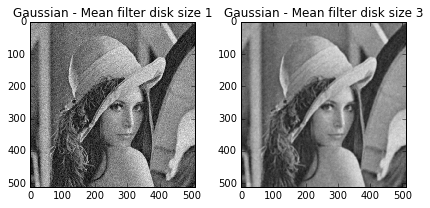

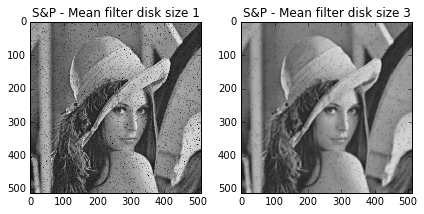

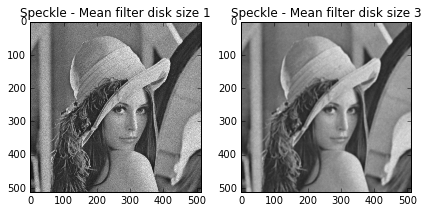

In [12]:
#Gaussian noise
lena_gaussian_mean_percentile1 = filters.rank.mean_percentile(lena_gaussian, morphology.disk(1), p0=0.05, p1=0.95)
lena_gaussian_mean_percentile3 = filters.rank.mean_percentile(lena_gaussian, morphology.disk(3), p0=0.05, p1=0.95)

plt.figure()
plt.subplot(121)
plt.title('Gaussian - Mean filter disk size 1')
io.imshow(lena_gaussian_mean_percentile1)
plt.subplot(122)
plt.title('Gaussian - Mean filter disk size 3')
io.imshow(lena_gaussian_mean_percentile3)

#Salt and pepper noise
lena_sp_mean_percentile1 = filters.rank.mean_percentile(lena_sp, morphology.disk(1), p0=0.05, p1=0.95)
lena_sp_mean_percentile3 = filters.rank.mean_percentile(lena_sp, morphology.disk(3), p0=0.05, p1=0.95)

plt.figure()
plt.subplot(121)
plt.title('S&P - Mean filter disk size 1')
io.imshow(lena_sp_mean_percentile1)
plt.subplot(122)
plt.title('S&P - Mean filter disk size 3')
io.imshow(lena_sp_mean_percentile3)

#Speckle noise
lena_speckle_mean_percentile1 = filters.rank.mean_percentile(lena_speckle, morphology.disk(1), p0=0.05, p1=0.95)
lena_speckle_mean_percentile3 = filters.rank.mean_percentile(lena_speckle, morphology.disk(3), p0=0.05, p1=0.95)

plt.figure()
plt.subplot(121)
plt.title('Speckle - Mean filter disk size 1')
io.imshow(lena_speckle_mean_percentile1)
plt.subplot(122)
plt.title('Speckle - Mean filter disk size 3')
io.imshow(lena_speckle_mean_percentile3)

** median filter: **

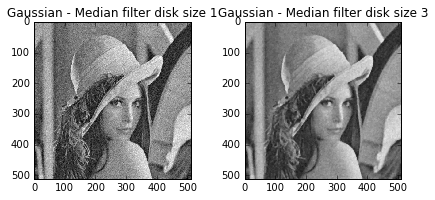

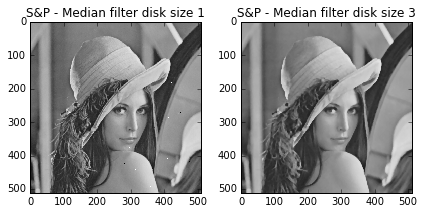

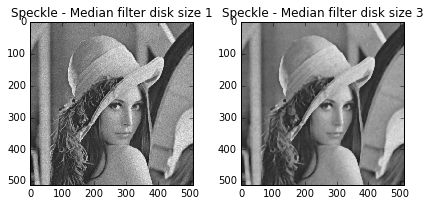

In [13]:
#Gaussian noise
lena_gaussian_median1 = filters.rank.median(lena_gaussian, morphology.disk(1))
lena_gaussian_median3 = filters.rank.median(lena_gaussian, morphology.disk(3))

plt.figure()
plt.subplot(121)
plt.title('Gaussian - Median filter disk size 1')
io.imshow(lena_gaussian_median1)
plt.subplot(122)
plt.title('Gaussian - Median filter disk size 3')
io.imshow(lena_gaussian_median3)

#Salt and pepper noise
lena_sp_median1 = filters.rank.median(lena_sp, morphology.disk(1))
lena_sp_median3 = filters.rank.median(lena_sp, morphology.disk(3))

plt.figure()
plt.subplot(121)
plt.title('S&P - Median filter disk size 1')
io.imshow(lena_sp_median1)
plt.subplot(122)
plt.title('S&P - Median filter disk size 3')
io.imshow(lena_sp_median3)

#Speckle noise
lena_speckle_median1 = filters.rank.median(lena_speckle, morphology.disk(1))
lena_speckle_median3 = filters.rank.median(lena_speckle, morphology.disk(3))

plt.figure()
plt.subplot(121)
plt.title('Speckle - Median filter disk size 1')
io.imshow(lena_speckle_median1)
plt.subplot(122)
plt.title('Speckle - Median filter disk size 3')
io.imshow(lena_speckle_median3)

## Sharpening

Use the `railway` image and sharpen the image using laplacian fitering.

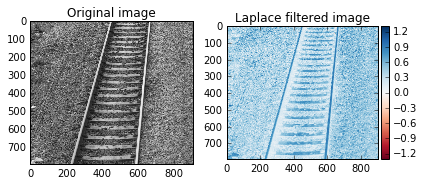

In [26]:
railway_im = io.imread(Path.__add__('railway.jpg'), as_grey=True)

plt.figure()
plt.subplot(121)
plt.title('Original image')
io.imshow(railway_im)

railway_laplace = ndimage.filters.laplace(railway_im)
railway_laplace = railway_im + railway_laplace
plt.subplot(122)
plt.title('Laplace filtered image')
io.imshow(railway_laplace)

## Hough transform

** Define your Hough_trans function which finds the lines within an image** 

you can use either `hough_line` and `hough_line_peaks` or `probabilistic_hough_line` from [`skimage.transform`](http://scikit-image.org/docs/dev/api/skimage.transform.html). 

search a bit to know the difference between `probablistic_hough_line` and `hough_line`

Or `HoughLines` and `HoughLinesP` from [`cv2`](http://docs.opencv.org/3.0-beta/doc/py_tutorials/py_tutorials.html)


Test your function on `railway` and `building` images. 

**Note : use `skimage.feature.canny` (`cv2.canny`) edge detector to find the primary edges**

In [33]:
def Hough_trans(input_im):
    
    edges = feature.canny(input_im, 4)    
    lines = transform.probabilistic_hough_line(edges, line_length=5, line_gap=3)
    
    plt.figure()
    io.imshow(input_im)
    plt.title('Detected lines')
    
    for i in range(0, len(lines)-1):
        x1 = lines[i][0][0]
        y1 = lines[i][0][1]
        x2 = lines[i][1][0]
        y2 = lines[i][1][1]
        plt.plot([x1, x2], [y1, y2], '-b')
        
    plt.show()
    
    return lines

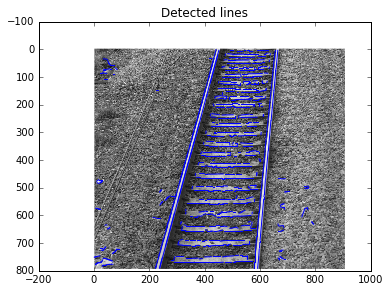

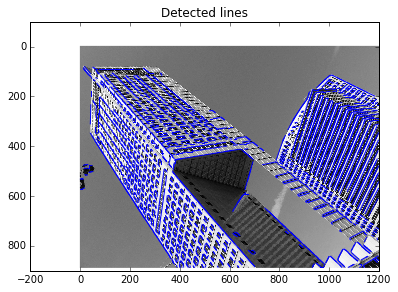

In [34]:
railway_im = io.imread(Path.__add__('railway.jpg'), as_grey=True)

railway_ht = Hough_trans(railway_im)

building_im = io.imread(Path.__add__('building.jpg'), as_grey=True)

building_ht = Hough_trans(building_im)